In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_country = pd.read_csv('country_specific_variables.csv')
data_region = pd.read_csv('region_specific_variables.csv')
data_region['code_country'] = data_region.code.apply(lambda x: x[:2])
data = pd.merge(left = data_region, right = data_country, on = 'code_country')
data = data.drop(columns = ['code_country', 'economic_damage_2_2', 'economic_damage_3_3'])
data = data.rename(columns = {'economic_damage_3_2':'economic_damage', 'NACE_B_E': 'NACE B-E'})
d = {}
for k in data.columns:
    if k not in ('code', 'deaths_increase', 'cases'):
        cur = k.replace('_', ' ')
        d[k] = cur[0].capitalize() + cur[1:]
data = data.rename(columns = d)
features = [_ for _ in data.columns[2:] if _ != 'cases']

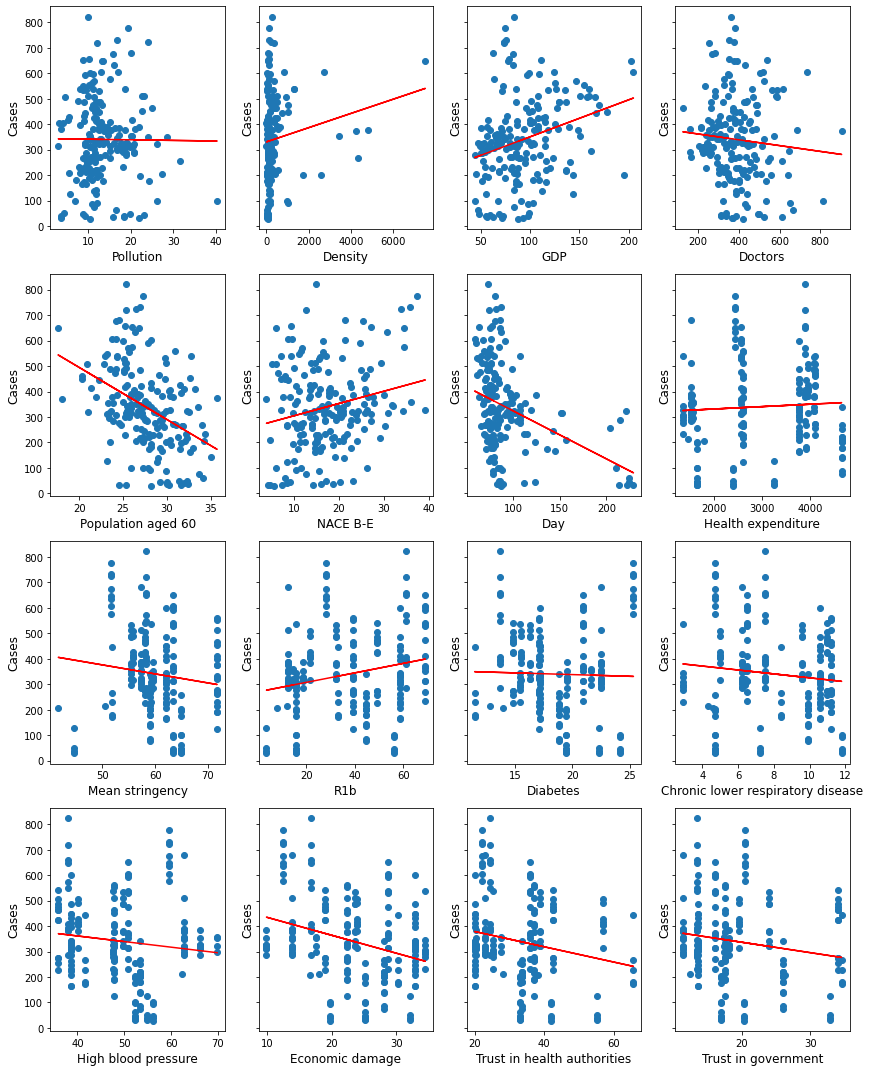

In [3]:
nrow = 4
ncol = 4
fig, axs = plt.subplots(nrow, ncol, figsize = (12,15), sharey=True)
for i in range(nrow):
    for j in range(ncol):
        
        feature = features[4*i+j]
        x = data[feature]
        y = data['cases']
        
        axs[i, j].scatter(x, y)
        axs[i, j].set_xlabel(feature, fontsize=12)
        axs[i, j].set_ylabel('Cases', fontsize=12)
        
        m, b = np.polyfit(x, y, 1)
        axs[i, j].plot(x, m*x+b, color = 'red')
        
fig.tight_layout()
fig.savefig("plots/cases_by_feature.png", facecolor='white', edgecolor='none', dpi=600)
plt.show()

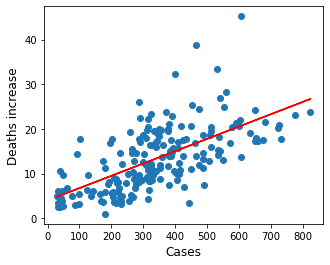

In [4]:
x = data['cases']
y = data['deaths_increase']

f, ax = plt.subplots(figsize=(5, 4))
        
ax.scatter(x, y)
ax.set_xlabel('Cases', fontsize=12)
ax.set_ylabel('Deaths increase', fontsize=12)
        
m, b = np.polyfit(x, y, 1)
ax.plot(x, m*x+b, color = 'red')

f.savefig("plots/deaths_by_cases.png", facecolor='white', edgecolor='none', dpi=600)
plt.show()

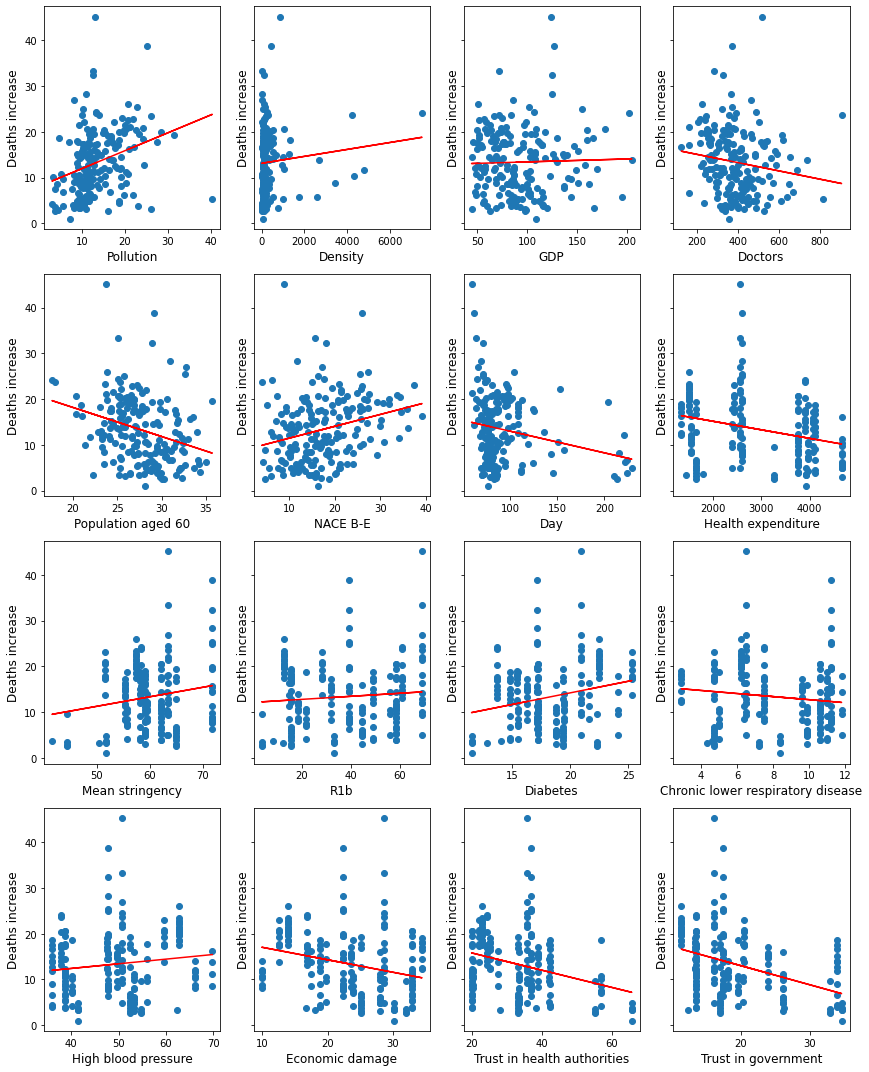

In [5]:
nrow = 4
ncol = 4
fig, axs = plt.subplots(nrow, ncol, figsize = (12,15), sharey=True)
for i in range(nrow):
    for j in range(ncol):
        
        feature = features[4*i+j]
        x = data[feature]
        y = data['deaths_increase']
        
        axs[i, j].scatter(x, y)
        axs[i, j].set_xlabel(feature, fontsize=12)
        axs[i, j].set_ylabel('Deaths increase', fontsize=12)
        
        m, b = np.polyfit(x, y, 1)
        axs[i, j].plot(x, m*x+b, color = 'red')
        
fig.tight_layout()
fig.savefig("plots/deaths_by_feature.png", facecolor='white', edgecolor='none', dpi=600)
plt.show()